In [1]:
import numpy as np
import sklearn as sk
import sklearn.tree
from collections import Counter

In [2]:
def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X[idxs], y[idxs]

In [3]:
def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common

In [4]:
class RandomForest:
    
    def __init__(self, n_estimators=2,#
                 criterion='gini',
                 max_depth=None,
                 min_samples_split=2,
                 min_samples_leaf=1,
                 min_weight_fraction_leaf=0.0,
                 max_features='auto',
                 max_leaf_nodes=None,
                 min_impurity_decrease=0.0,#
                 n_feats=None,#
                 bootstrap=True,
                 random_state=None, 
                 max_samples=None):
        self.n_estimators = n_estimators
        self.criterion = criterion
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.min_weight_fraction_leaf = min_weight_fraction_leaf
        self.max_features = max_features
        self.max_leaf_nodes = max_leaf_nodes
        self.min_impurity_decrease = min_impurity_decrease
        self.n_feats = n_feats
        self.bootstrap = bootstrap 
        self.random_state = random_state
        self.max_samples = max_samples
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_estimators):
            tree = sk.tree.DecisionTreeClassifier(criterion = self.criterion,
                                                  max_depth = self.max_depth,
                                                  min_samples_split = self.min_samples_split,
                                                  min_samples_leaf = self.min_samples_leaf,
                                                  min_weight_fraction_leaf = self.min_weight_fraction_leaf,
                                                  max_features = self.max_features,
                                                  max_leaf_nodes = self.max_leaf_nodes,
                                                  min_impurity_decrease = self.min_impurity_decrease)
            X_samp, y_samp = bootstrap_sample(X, y)
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)

In [5]:
from sklearn import datasets

In [6]:
def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred)/len(y_true)
  return accuracy

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
import pandas as pd
import seaborn as sns

In [9]:
train = pd.read_csv("train.csv")

In [10]:
train.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
0,0,0.10859,0.004314,-37.566,0.017364,0.28915,-10.25100,135.12,168900.0,3.992400e+14,...,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.1,1.01770,1
1,1,0.10090,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,...,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.0,0.28359,0
2,2,0.17803,-0.006980,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,...,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.2,0.40690,1
3,3,0.15236,0.007259,780.100,0.025179,0.51947,7.49140,112.51,259490.0,7.781400e+13,...,-34.8580,2.0694,0.79631,-16.33600,4952.40,1.1784,4.533000e+12,4889.1,0.51486,1
4,4,0.11623,0.502900,-109.150,0.297910,0.34490,-0.40932,2538.90,65332.0,1.907200e+15,...,-13.6410,1.5298,1.14640,-0.43124,3856.50,1.4830,-8.991300e+12,NaN,0.23049,1


<AxesSubplot:>

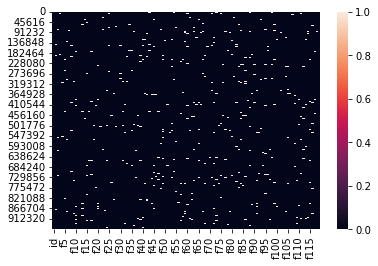

In [11]:
sns.heatmap(train.isna())

<AxesSubplot:>

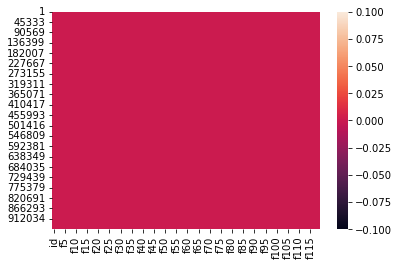

In [12]:
train.dropna(axis=0,inplace=True)
sns.heatmap(train.isna())

In [13]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('claim',axis=1).drop('id',axis=1).values, train['claim'].values, test_size=0.25, random_state=123)
train.drop('claim',axis=1).drop('id',axis=1).head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118
1,0.100900,0.29961,11822.000,0.276500,0.459700,-0.837330,1721.900,119810.0,3.874100e+15,9953.60000,...,0.976730,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.00,0.28359
8,-0.008948,0.33802,503.810,0.601520,0.261760,0.735380,1614.000,408030.0,7.684400e+14,5.38200,...,0.307160,-9.5142,2.2176,-1.23750,7.07130,1030.80,1.2040,5.290300e+15,1968.10,0.14593
9,0.126230,0.17396,1662.000,0.038081,0.000485,0.059909,296.070,-8035.3,4.526300e+15,-90.30400,...,0.007485,-1.9684,3.9595,19.16900,-0.24498,838.39,1.1968,2.567000e+17,4914.90,0.51976
11,0.078650,0.38745,1025.900,0.082626,0.267070,-1.476200,2170.100,513560.0,9.716600e+12,0.08325,...,0.073060,-17.1010,1.5954,121.02000,-9.33300,45667.00,1.2490,5.059300e+15,5422.30,0.57097
14,0.072488,0.47341,-22.274,0.002846,0.384460,3.548400,-40.267,739910.0,4.615400e+15,100.20000,...,0.256130,-10.3290,1.6152,195.36000,1.05310,1806.40,1.2229,6.537300e+15,591.48,0.30038


In [14]:
mrfc = RandomForest()
mrfc.fit(X_train, y_train)

In [15]:
y_pred = mrfc.predict(X_train)
accuracy(y_train, y_pred)

0.9097730695331567

In [16]:
y_pred = mrfc.predict(X_test)
accuracy(y_test, y_pred)

0.755202189927225

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
sklearn_rfc = RandomForestClassifier(n_estimators=2, criterion='gini', 
                                     max_depth=None, min_samples_split=2, 
                                     min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                     max_features='auto', max_leaf_nodes=None, 
                                     min_impurity_decrease=0.0,
                                     bootstrap=True, random_state=None, max_samples=None)

sklearn_rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2)

In [19]:
y_pred = sklearn_rfc.predict(X_test)
accuracy(y_test, y_pred)

0.8475730532125609

In [20]:
from lightgbm import LGBMClassifier

In [21]:
lightgbm_rfc = LGBMClassifier(n_estimators=2, criterion='gini', 
                              max_depth=None, min_samples_split=2, 
                              min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                              max_features='auto', max_leaf_nodes=None, 
                              min_impurity_decrease=0.0, min_impurity_split=None,
                              bootstrap=True, random_state=None, max_samples=None)

lightgbm_rfc.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_impurity_decrease
[LightGBM] [Warning] Unknown parameter: min_weight_fraction_leaf
[LightGBM] [Warning] Unknown parameter: min_samples_leaf
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] Unknown parameter: criterion


LGBMClassifier(bootstrap=True, criterion='gini', max_depth=None,
               max_features='auto', max_leaf_nodes=None, max_samples=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=2)

In [22]:
y_pred = lightgbm_rfc.predict(X_test)
accuracy(y_test, y_pred)

0.8660116172968643

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [24]:
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X_train, y_train)

In [25]:
scores = fit.scores_

score_mean = np.mean(scores)
filter_arr = scores >= score_mean
scores = scores[filter_arr]
scores

array([12.24622308, 26.40864755, 67.79463941,  9.89420216, 44.29103971,
       10.74148215,  9.27587205, 10.59583771, 10.5355659 , 18.24533584,
       86.76115312, 27.44838791, 13.32763944,  9.3505075 , 43.79760063,
        9.31550809, 18.57624414, 18.15235723, 13.95000781, 38.9225621 ,
       48.64726228, 16.10087194, 10.37385047, 10.88954311, 20.45044955,
        7.82128812, 11.20861782, 15.17372044, 16.07920855, 11.15741421,
        9.40709189, 11.84310169, 10.22482549,  9.01620432])

In [26]:
dropLabels = train.drop('claim',axis=1).drop('id',axis=1).columns[filter_arr] + 'claim' + 'id'
clr_train = train.values
X_train, X_test, y_train, y_test = train_test_split(clr_train, train['claim'].values, test_size=0.25, random_state=123)

In [27]:
mrfc = RandomForest()
mrfc.fit(X_train, y_train)

In [28]:
y_pred = mrfc.predict(X_train)
accuracy(y_train, y_pred)

0.9900258903997804

In [29]:
y_pred = mrfc.predict(X_test)
accuracy(y_test, y_pred)

0.972993123094385

In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [31]:
params = {
    'n_estimators': range(10, 200),
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 50),
    'min_samples_leaf': range(1, 100),
    'max_leaf_nodes': range(10, 200),
    'max_samples': range(10, 10000)
}
clf = RandomizedSearchCV(sklearn_rfc, params, cv=5)
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=2),
                   param_distributions={'max_depth': range(1, 10),
                                        'max_leaf_nodes': range(10, 200),
                                        'max_samples': range(10, 10000),
                                        'min_samples_leaf': range(1, 100),
                                        'min_samples_split': range(2, 50),
                                        'n_estimators': range(10, 200)})

In [32]:
clf.best_params_

{'n_estimators': 184,
 'min_samples_split': 32,
 'min_samples_leaf': 24,
 'max_samples': 4266,
 'max_leaf_nodes': 57,
 'max_depth': 8}

In [33]:
my_rfc = RandomForest(**clf.best_params_)
my_rfc.fit(X_train, y_train)

In [34]:
sklearn_rfc = RandomForestClassifier(**clf.best_params_)
sklearn_rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_leaf_nodes=57, max_samples=4266,
                       min_samples_leaf=24, min_samples_split=32,
                       n_estimators=184)

In [35]:
lightgbm_rfc = LGBMClassifier(**clf.best_params_)
lightgbm_rfc.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: min_samples_leaf
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: max_leaf_nodes
[LightGBM] [Warning] Unknown parameter: max_samples


LGBMClassifier(max_depth=8, max_leaf_nodes=57, max_samples=4266,
               min_samples_leaf=24, min_samples_split=32, n_estimators=184)

In [37]:
y_pred = my_rfc.predict(X_test)
accuracy(y_test, y_pred)

0.8719649255558276

In [38]:
y_pred = sklearn_rfc.predict(X_test)
accuracy(y_test, y_pred)

0.997251463289787

In [39]:
y_pred = lightgbm_rfc.predict(X_test)
accuracy(y_test, y_pred)

1.0

In [40]:
%timeit my_rfc.predict(X_test)

3.2 s ± 44.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [41]:
%timeit sklearn_rfc.predict(X_test)

626 ms ± 21.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [42]:
%timeit lightgbm_rfc.predict(X_test)

66.7 ms ± 2.17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [43]:
class Ensemble:
    
    def __init__(self, 
                 n_estimators=100, 
                 criterion='gini',
                 max_depth=None, 
                 min_samples_split=2,
                 min_samples_leaf=1, 
                 min_weight_fraction_leaf=0.0,
                 max_features='auto', 
                 max_leaf_nodes=None, 
                 min_impurity_decrease=0.0,
                 min_impurity_split=None, 
                 bootstrap=True, 
                 random_state=None, 
                 max_samples=None):
        self.n_estimators = n_estimators
        self.criterion = criterion
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.min_weight_fraction_leaf = min_weight_fraction_leaf
        self.max_features = max_features
        self.max_leaf_nodes = max_leaf_nodes
        self.min_impurity_decrease = min_impurity_decrease
        self.bootstrap = bootstrap
        self.random_state = random_state
        self.max_samples = max_samples

        self.mrfc = RandomForest(n_estimators=self.n_estimators, 
                                 criterion=self.criterion, 
                                 max_depth=self.max_depth,
                                 min_samples_split=self.min_samples_split, 
                                 min_weight_fraction_leaf=self.min_weight_fraction_leaf, 
                                 max_features=self.max_features,
                                 max_leaf_nodes=self.max_leaf_nodes, 
                                 min_impurity_decrease=self.min_impurity_decrease, 
                                 bootstrap=self.bootstrap, 
                                 random_state=self.random_state, 
                                 max_samples=self.max_samples)
        
        self.srfc = RandomForestClassifier(n_estimators=self.n_estimators, 
                                           criterion=self.criterion, 
                                           max_depth=self.max_depth,
                                           min_samples_split=self.min_samples_split, 
                                           min_samples_leaf=self.min_samples_leaf, 
                                           min_weight_fraction_leaf=self.min_weight_fraction_leaf, 
                                           max_features=self.max_features,
                                           max_leaf_nodes=self.max_leaf_nodes, 
                                           min_impurity_decrease=self.min_impurity_decrease, 
                                           bootstrap=self.bootstrap, 
                                           random_state=self.random_state,
                                           max_samples=self.max_samples)
        
        self.lrfc = LGBMClassifier(n_estimators=self.n_estimators,
                                   criterion=self.criterion, 
                                   max_depth=self.max_depth,
                                   min_samples_split=self.min_samples_split, 
                                   min_samples_leaf=self.min_samples_leaf,
                                   min_weight_fraction_leaf=self.min_weight_fraction_leaf, 
                                   max_features=self.max_features,
                                   max_leaf_nodes=self.max_leaf_nodes, 
                                   min_impurity_decrease=self.min_impurity_decrease,
                                   bootstrap=self.bootstrap, 
                                   random_state=self.random_state,
                                   max_samples=self.max_samples)
        
    def fit(self, x, y):
        X_samp, y_samp = bootstrap_sample(x, y)
        
        self.mrfc.fit(X_samp, y_samp)
        self.srfc.fit(X_samp, y_samp)
        self.lrfc.fit(X_samp, y_samp)

    def predict(self, x):
        pred_summ = np.array([0 for item in range(x.shape[0])])

        predictions = list(self.mrfc.predict(x))
        for i, val in enumerate(predictions):
            pred_summ[i] += val
            
        predictions = list(self.srfc.predict(x))
        for i, val in enumerate(predictions):
            pred_summ[i] += val

        predictions = list(self.lrfc.predict(x))
        for i, val in enumerate(predictions):
            pred_summ[i] += val
    
        predictions = [1 if pred > 1 else 0 for pred in pred_summ]
        return np.array(predictions)

In [44]:
ensamble = Ensemble(**clf.best_params_)
ensamble.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: min_impurity_decrease
[LightGBM] [Warning] Unknown parameter: min_weight_fraction_leaf
[LightGBM] [Warning] Unknown parameter: min_samples_leaf
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_samples
[LightGBM] [Warning] Unknown parameter: max_leaf_nodes
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] Unknown parameter: criterion


In [45]:
y_pred = ensamble.predict(X_test)
accuracy(y_test, y_pred)

0.979469432265818